# Regression Model Validation - Lab

## Introduction

In this lab, you'll be able to validate your Ames Housing data model using train-test split.


## Objectives

You will be able to:

- Compare training and testing errors to determine if model is over or underfitting


In [1]:
import pandas as pd

## Let's use our Ames Housing Data again!

We included the code to preprocess below.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

ames = pd.read_csv('ames.csv')

# using 9 predictive categorical or continuous features, plus the target SalePrice
continuous = ['LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']
categoricals = ['BldgType', 'KitchenQual', 'SaleType', 'MSZoning', 'Street', 'Neighborhood']

ames_cont = ames[continuous]

# log features
log_names = [f'{column}_log' for column in ames_cont.columns]

ames_log = np.log(ames_cont)
ames_log.columns = log_names

# normalize (subract mean and divide by std)

def normalize(feature):
    return (feature - feature.mean()) / feature.std()

ames_log_norm = ames_log.apply(normalize)

# one hot encode categoricals
ames_ohe = pd.get_dummies(ames[categoricals], prefix=categoricals, drop_first=True)

preprocessed = pd.concat([ames_log_norm, ames_ohe], axis=1)

In [3]:
X = preprocessed.drop('SalePrice_log', axis=1)
y = preprocessed['SalePrice_log']

### Perform a train-test split

In [4]:
# Split the data into training and test sets. Use the default split size

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

### Apply your model to the train set

In [5]:
# Import and initialize the linear regression model class

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [6]:
# Fit the model to train data

linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Calculate predictions on training and test sets

In [7]:
# Calculate predictions on training and test sets

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

### Calculate training and test residuals

In [8]:
# Calculate residuals

train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

### Calculate the Mean Squared Error (MSE)

A good way to compare overall performance is to compare the mean squarred error for the predicted values on the training and test sets.

In [9]:
# Import mean_squared_error from sklearn.metrics

from sklearn.metrics import mean_squared_error

In [10]:
# Calculate training and test MSE

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 0.16180811110330837
Test Mean Squarred Error: 0.17098684713028267


If your test error is substantially worse than the train error, this is a sign that the model doesn't generalize well to future cases.

One simple way to demonstrate overfitting and underfitting is to alter the size of our train-test split. By default, scikit-learn allocates 25% of the data to the test set and 75% to the training set. Fitting a model on only 10% of the data is apt to lead to underfitting, while training a model on 99% of the data is apt to lead to overfitting.

# Evaluate the effect of train-test split size

Iterate over a range of train-test split sizes from .5 to .95. For each of these, generate a new train/test split sample. Fit a model to the training sample and calculate both the training error and the test error (mse) for each of these splits. Plot these two curves (train error vs. training size and test error vs. training size) on a graph.

In [12]:
train_sizes = list(range(5, 100, 5))

train_error = []
test_error = []

for train_size in train_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = train_size/100)
    linreg.fit(X_train, y_train)
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    train_error.append(mean_squared_error(y_train, y_hat_train))
    test_error.append(mean_squared_error(y_test, y_hat_test))
    
display(train_error)
display(test_error)

[0.16059681246357063,
 0.1632152303182298,
 0.1639627956182109,
 0.16174530599175263,
 0.15037299644121238,
 0.14527889519873252,
 0.14976661036753905,
 0.1594324202992111,
 0.15359448756755328,
 0.174156513189974,
 0.15501559684023686,
 0.14452899216198814,
 0.14597250222721625,
 0.11800676811071077,
 0.12403988671762603,
 0.1958158373384814,
 0.12887766079468982,
 0.14276186746692693,
 0.07553168751039765]

[0.17302885009320504,
 0.15604571552840626,
 0.15813311910173053,
 0.17275278817461406,
 0.21072033836373594,
 0.20953536448148521,
 0.20122851923149845,
 0.17387072870960193,
 0.19023632094873907,
 0.16851187301521614,
 0.18576100590777983,
 0.18790656738370815,
 0.19488222828521196,
 0.2093673789381687,
 0.20543940335347385,
 0.20505875457462025,
 0.2019386421664385,
 0.2414885902788309,
 0.29860315681720206]

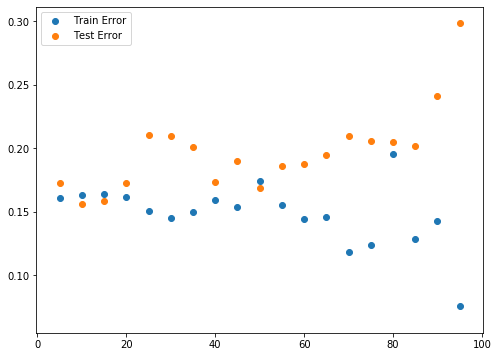

In [28]:
fig = plt.figure(figsize = (8,6))
plt.scatter(train_sizes, train_error, label = 'Train Error')
plt.scatter(train_sizes, test_error, label = 'Test Error')
plt.legend();

# Evaluate the effect of train-test split size: Extension

Repeat the previous example, but for each train-test split size, generate 10 iterations of models/errors and save the average train/test error. This will help account for any particularly good/bad models that might have resulted from poor/good splits in the data. 

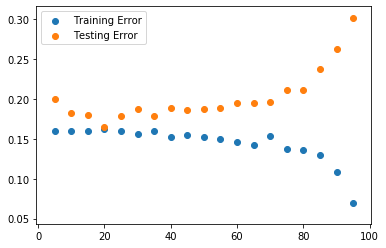

In [27]:
train_err = []
test_err = []
t_sizes = range(5,100,5)
for t_size in t_sizes:
    temp_train_err = []
    temp_test_err = []
    for i in range(10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size/100)
        linreg.fit(X_train, y_train)
        y_hat_train = linreg.predict(X_train)
        y_hat_test = linreg.predict(X_test)
        temp_train_err.append(mean_squared_error(y_train, y_hat_train))
        temp_test_err.append(mean_squared_error(y_test, y_hat_test))
    train_err.append(np.mean(temp_train_err))
    test_err.append(np.mean(temp_test_err))
plt.scatter(t_sizes, train_err, label='Training Error')
plt.scatter(t_sizes, test_err, label='Testing Error')
plt.legend();

What's happening here? Evaluate your result!

##  Summary 

Congratulations! You now practiced your knowledge of MSE and used your train-test split skills to validate your model.